In [49]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from acquire import load_heb_data, acquire_open_power_systems

In [27]:
df = load_heb_data()

In [28]:
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


# Store Data

## 1. 
Convert `sale_date` column to datetime format.

In [29]:
df.sale_date = pd.to_datetime(df.sale_date, format=('%a, %d %b %Y %H:%M:%S %Z'))

## 2.
Plot the distribution of `sale_amount` and `item_price`.

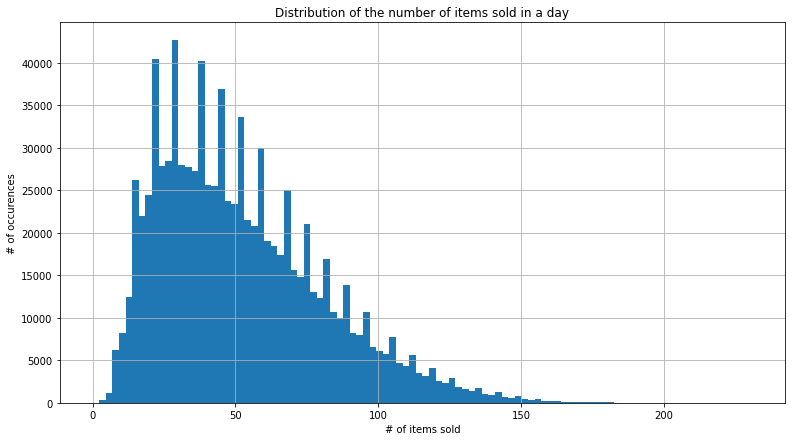

In [30]:
df.sale_amount.hist(figsize=(13, 7),
                    bins=100)

plt.title(label='Distribution of the number of items sold in a day')
plt.xlabel('# of items sold')
plt.ylabel('# of occurences');

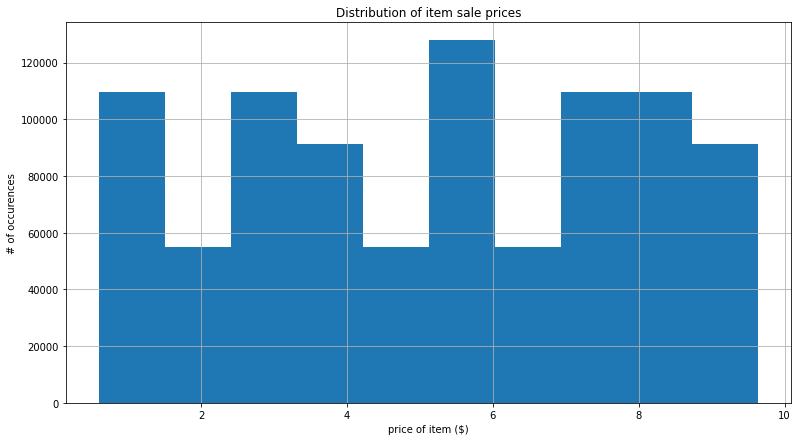

In [31]:
df.item_price.hist(figsize=(13, 7),
                   bins=10)

plt.title(label='Distribution of item sale prices')
plt.xlabel('price of item ($)')
plt.ylabel('# of occurences');

## 3.
Set the index to be the datetime variable (`sale_date`).

In [32]:
df = df.set_index('sale_date').sort_index()

In [33]:
df.index.dtype

datetime64[ns, GMT]

## 4.
Add a `month` and `day_of_week` column to your dataframe.

In [35]:
df = df.assign(
    month = df.index.month,
    day_of_week = df.index.day_name()
)

In [41]:
df.columns.to_list()[-2:]

['month', 'day_of_week']

## 5.
Add a column to your dataframe, `sales_total`, which is a derived from `sale_amount` (total items) and `item_price`.

In [42]:
df = df.assign(
    sales_total = df.sale_amount * df.item_price
)

In [43]:
df[['sale_amount', 'item_price', 'sales_total']].head()

,sale_amount,item_price,sales_total
sale_date,,,
2013-01-01 00:00:00+00:00,13.0,0.84,10.92
2013-01-01 00:00:00+00:00,26.0,8.40,218.40
2013-01-01 00:00:00+00:00,27.0,4.65,125.55
2013-01-01 00:00:00+00:00,54.0,8.40,453.60
2013-01-01 00:00:00+00:00,35.0,8.40,294.00


## 6.
Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [46]:
def prepare_store_data(df):
    '''
    Accepts the raw HEB store dataset
    
    Returns prepared HEB store data as a pandas DataFrame
    
    parameters
    ----------
    df : pandas.DataFrame
        Accepts the HEB dataset. Merged dataframe of : stores, items, and sales
        
    returns
    -------
    df : pandas.DataFrame
        Prepared HEB dataset  
    '''
    # Format the date of the column
    df.sale_date = pd.to_datetime(df.sale_date, format=('%a, %d %b %Y %H:%M:%S %Z'))
    df = df.set_index('sale_date').sort_index()
    
    # Create new columns: month, day of week, and sales total
    df = df.assign(
        month = df.index.month,
        day_of_week = df.index.day_name(),
        sales_total = df.sale_amount * df.item_price
    )
    
    return df

In [45]:
df=load_heb_data()

In [48]:
prepare_store_data(df).head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,294.00


# Open Power Systems Data

In [51]:
df_ops = acquire_open_power_systems()

In [52]:
df_ops.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


## 1.
Convert `Date` column to datetime format.

In [57]:
df_ops.Date = pd.to_datetime(df_ops.Date)

In [67]:
df_ops.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

## 2.
Plot the distribution of each of your variables.

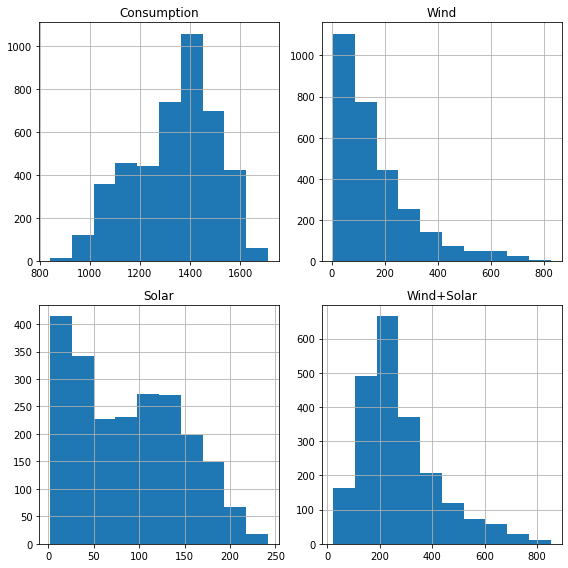

In [74]:
df_ops.hist(figsize=(8, 8))
plt.tight_layout();

## 3.
Set the index to be the datetime variable.

In [75]:
df_ops = df_ops.set_index('Date').sort_index()

## 4.
Add a month and a year column to your dataframe.

In [78]:
df_ops = df_ops.assign(
    month=df_ops.index.month,
    year=df_ops.index.year
)

In [80]:
df_ops.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006


## 5.
Fill any missing values.

In [83]:
df_ops = df_ops.fillna(0)

In [84]:
df_ops.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,2006


## 6.
Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [85]:
def prepare_ops_data(df):
    '''
    This function prepares Germany's Open Power Systems data
    
    parameters
    ----------
    df : pandas DataFrame
        raw open power systems data
    
    returns
    -------
    df: pandas DataFrame
        Prepared open power systems data
    '''
    df.Date = pd.to_datetime(df.Date)
    df = df.set_index('Date').sort_index()
    
    df = df.assign(
    month=df.index.month,
    year=df.index.year
    )
    
    df = df.fillna(0)
    return df
    
    

In [86]:

prepare_ops_data(acquire_open_power_systems())

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,1,2006
2006-01-02,1380.52100,0.000,0.000,0.000,1,2006
2006-01-03,1442.53300,0.000,0.000,0.000,1,2006
2006-01-04,1457.21700,0.000,0.000,0.000,1,2006
2006-01-05,1477.13100,0.000,0.000,0.000,1,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12,2017
2017-12-28,1299.86398,506.424,14.162,520.586,12,2017
2017-12-29,1295.08753,584.277,29.854,614.131,12,2017
